In [1]:
import pandas as pd
import dask
import dask.multiprocessing
import multiprocessing
from glob import glob
from fbd import get_permno_returns, read_parquet, get_2month_returns
import time

In [2]:
dask.config.set(scheduler='processes', num_workers=multiprocessing.cpu_count())

# Data

In [3]:
const_mat = pd.read_csv('data/russell3000.csv.gz', compression='gzip',
                        index_col=0)

In [14]:
const_mat.loc['2010-02']['10163']

0.0

In [5]:
info = pd.read_csv('data/permno_info.csv.gz', compression='gzip',
                   index_col=0)
info['permno'] = info['permno'].astype(int)

In [6]:
info.shape

(16336, 4)

In [7]:
info.head()

,permno,comnam,naics,ticker
0,10026,J & J SNACK FOODS CORP,NaN,JJSF
1,10026,J & J SNACK FOODS CORP,311821.0,JJSF
2,10026,J & J SNACK FOODS CORP,311813.0,JJSF
3,10032,PLEXUS CORP,NaN,PLXS
4,10032,PLEXUS CORP,334412.0,PLXS


In [8]:
info.isna().sum()

permno       0
comnam       0
naics     5496
ticker     435
dtype: int64

In [9]:
%%time
res = get_permno_returns('93419', const_mat)
res = dask.compute(res)[0]

CPU times: user 303 ms, sys: 56.1 ms, total: 360 ms
Wall time: 1.51 s


<AxesSubplot:>

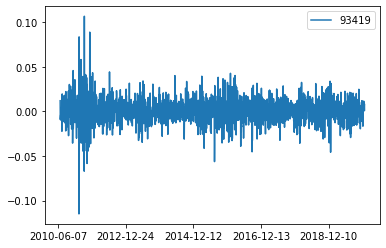

In [10]:
res.plot()

In [11]:
%%time
res = get_2month_returns('2010-02', const_mat)

ArrowInvalid: Field named '10163' not found or not unique in the schema.